In [2]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
import scipy.signal as st

sns.set(palette = 'muted', style = 'darkgrid')

In [3]:
mod_path = '/Users/ishareef7/Springboard/Capstone2'
sys.path.append(mod_path)
from src.features import build_dataset

In [29]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [4]:
audio_features = build_dataset.get_dataset_echonest()
genres = build_dataset.get_genres()
genre_dict = dict(genres['title'])

In [5]:
order = audio_features['genre_top'].value_counts().index
sorted_genre = [genre_dict[int(i)] for i in order]

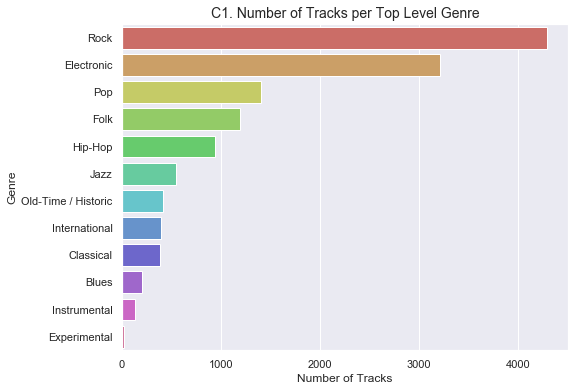

In [59]:
#Create side by side subplots
fig= plt.figure(figsize=(8,6))

#Count plot for the number of households 
c1 = sns.countplot( y = 'genre_top', data = audio_features, order = audio_features['genre_top'].value_counts().index,
              palette = 'hls', orient = 'v')
_ = c1.set(xlabel = 'Number of Tracks', ylabel = 'Genre')
_ = c1.set_title('C1. Number of Tracks per Top Level Genre',fontsize=14)
_ = c1.set_yticklabels(labels= sorted_genre)
_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c1.jpg')

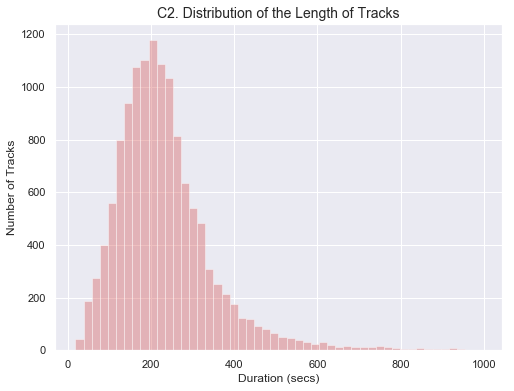

In [60]:
times = audio_features[audio_features['duration'] < 1000]['duration']

fig = plt.figure(figsize=(8,6))

c2 = sns.distplot(times , kde=False, rug=False, color='r')
_ = c2.set(xlabel = 'Duration (secs)', ylabel = 'Number of Tracks')
_ = c2.set_title('C2. Distribution of the Length of Tracks',fontsize=14)
_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c2.jpg')

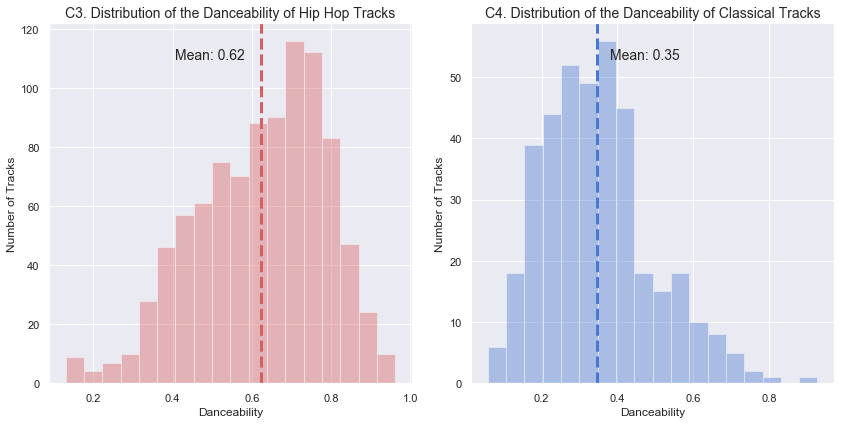

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

hip_hop_dance = audio_features[(audio_features['genre_top'] == 21)]['audio_features_danceability']

c3 = sns.distplot(hip_hop_dance , kde=False, rug=False, color='r',ax =ax1)
_ = c3.set(xlabel = 'Danceability', ylabel = 'Number of Tracks')
_ = c3.set_title('C3. Distribution of the Danceability of Hip Hop Tracks',fontsize=14)

_ = ax1.axvline(hip_hop_dance.mean(), color='r', linestyle='dashed', linewidth=3)
_ , max_ = ax1.get_ylim()
_ = ax1.text(hip_hop_dance.mean() - .35*hip_hop_dance.mean(), max_ - max_/10, 
            'Mean: {:.2f}'.format(hip_hop_dance.mean()),fontsize=14)

classical_dance = audio_features[(audio_features['genre_top'] == 5)]['audio_features_danceability']

c4 = sns.distplot(classical_dance , kde=False, rug=False, color='b', ax =ax2)
_ = c4.set(xlabel = 'Danceability', ylabel = 'Number of Tracks')
_ = c4.set_title('C4. Distribution of the Danceability of Classical Tracks',fontsize=14)

_ = ax2.axvline(classical_dance.mean(), color='b', linestyle='dashed', linewidth=3)
_ , max_ = ax2.get_ylim()
_ = ax2.text(classical_dance.mean() + classical_dance.mean()/10, max_ - max_/10, 
            'Mean: {:.2f}'.format(classical_dance.mean()),fontsize=14)

_ = plt.tight_layout()

_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c3_4.jpg')

## Bootstrap CIs (Danceability)

In [32]:
bs_replicates = draw_bs_reps(hip_hop_dance, np.mean, size=10000)
lb,ub = np.percentile(bs_replicates, [2.5,97.5])
err_mar = (ub-lb)/2
print('95% CI for Hip Hop Track Danceability:', lb,'-', ub)

95% CI for Hip Hop Track Danceability: 0.6123837975996906 - 0.6332012537497226


In [44]:
bs_replicates = draw_bs_reps(classical_dance, np.mean, size=10000)
lb,ub = np.percentile(bs_replicates, [2.5,97.5])
err_mar = (ub-lb)/2
print('95% CI for Classical Track Danceability:', lb,'-', ub)

95% CI for Classical Track Danceability: 0.33156875770333977 - 0.360773807962739


In [10]:
np.fill_diagonal(cross_correlation, 0)
image = np.log(cross_correlation)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


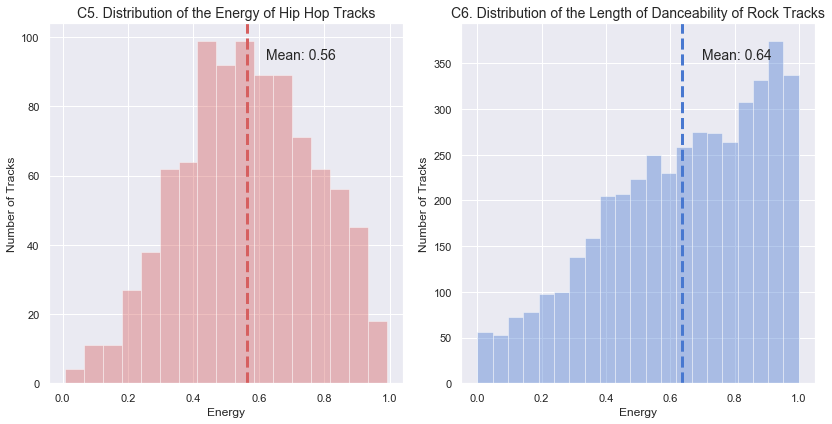

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

hip_hop_energy = audio_features[(audio_features['genre_top'] == 21)]['audio_features_energy']

c5 = sns.distplot(hip_hop_energy , kde=False, rug=False, color='r',ax =ax1)
_ = c5.set(xlabel = 'Energy', ylabel = 'Number of Tracks')
_ = c5.set_title('C5. Distribution of the Energy of Hip Hop Tracks',fontsize=14)

_ = ax1.axvline(hip_hop_energy.mean(), color='r', linestyle='dashed', linewidth=3)
_ , max_ = ax1.get_ylim()
_ = ax1.text(hip_hop_energy.mean() + hip_hop_energy.mean()/10, max_ - max_/10, 
            'Mean: {:.2f}'.format(hip_hop_energy.mean()),fontsize=14)

rock_energy = audio_features[(audio_features['genre_top'] == 12)]['audio_features_energy']

c6 = sns.distplot(rock_energy , kde=False, rug=False, color='b', ax =ax2)
_ = c6.set(xlabel = 'Energy', ylabel = 'Number of Tracks')
_ = c6.set_title('C6. Distribution of the Length of Danceability of Rock Tracks',fontsize=14)

_ = ax2.axvline(rock_energy.mean(), color='b', linestyle='dashed', linewidth=3)
_ , max_ = ax2.get_ylim()
_ = ax2.text(rock_energy.mean() + rock_energy.mean()/10, max_ - max_/10, 
            'Mean: {:.2f}'.format(rock_energy.mean()),fontsize=14)

_ = plt.tight_layout()

_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c5_6.jpg')

## Bootstrap CIs (Energy)

In [46]:
bs_replicates = draw_bs_reps(hip_hop_energy, np.mean, size=10000)
lb,ub = np.percentile(bs_replicates, [2.5,97.5])
err_mar = (ub-lb)/2
print('95% CI for Hip Hop Track Energy:', lb,'-', ub)

95% CI for Hip Hop Track Energy: 0.5520440370108646 - 0.577587585860731


In [47]:
bs_replicates = draw_bs_reps(rock_energy, np.mean, size=10000)
lb,ub = np.percentile(bs_replicates, [2.5,97.5])
err_mar = (ub-lb)/2
print('95% CI for Rock Track Energy:', lb,'-', ub)

95% CI for Rock Track Energy: 0.6282698996023864 - 0.643459617346543


In [9]:
enc = MultiLabelBinarizer()
genres_indicator = enc.fit_transform(audio_features['genres'])
genres_names = enc.classes_
genres_names = genres.loc[enc.classes_, 'title'].values
cross_correlation = genres_indicator.T @ genres_indicator

In [11]:
g = pd.DataFrame(genres_indicator, columns = genres_names)
top50 = g.sum(axis=0).sort_values(ascending = False).index[:50]
cross_correlation = pd.DataFrame(cross_correlation , index = genres_names, columns = genres_names)

/Users/ishareef7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


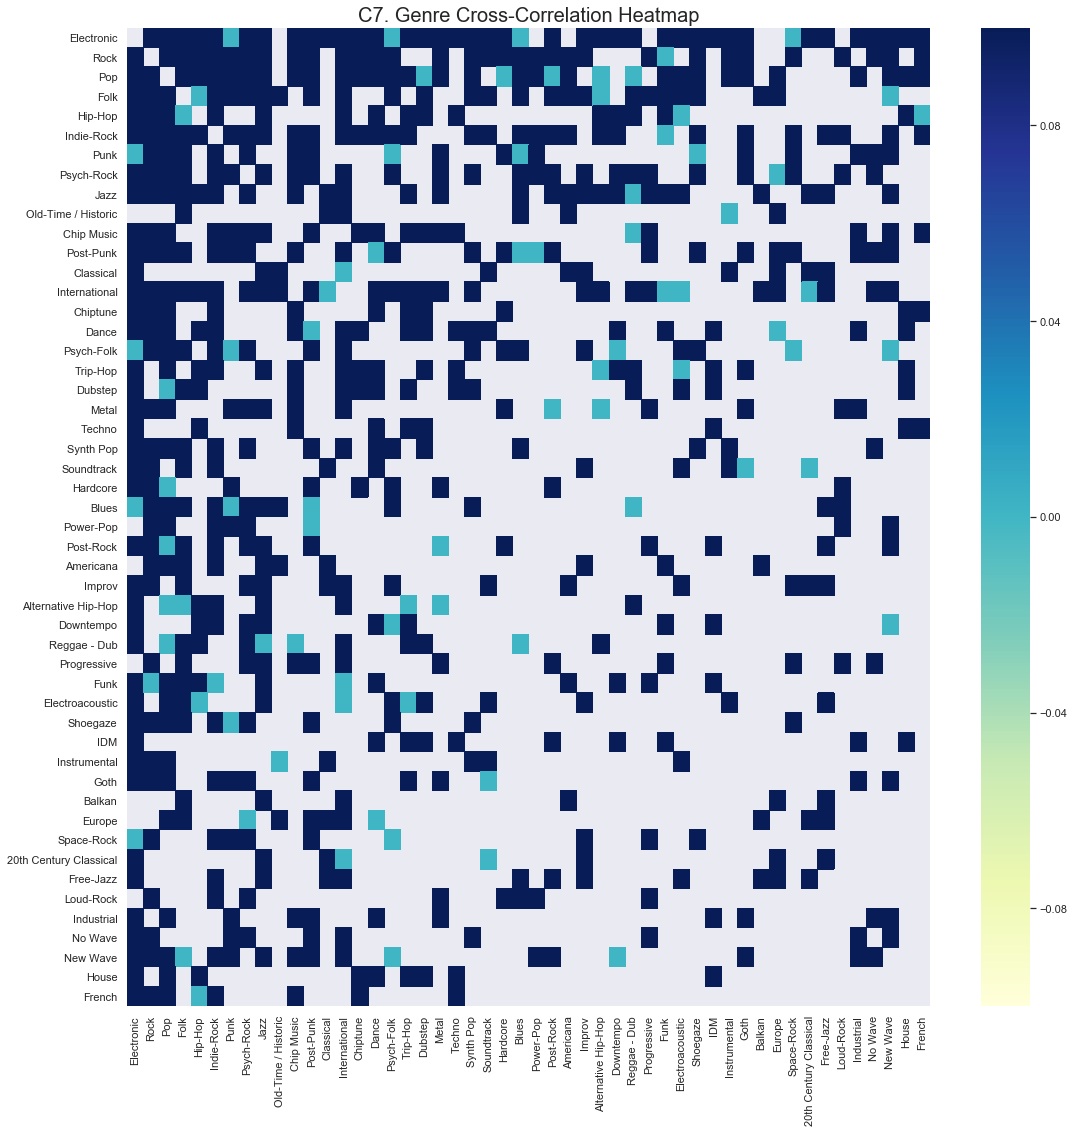

In [63]:
fig =  plt.figure(figsize=(18, 18))
c7 = sns.heatmap(np.log(cross_correlation.loc[top50,top50]) ,cmap="YlGnBu")
_ = c7.set_title('C7. Genre Cross-Correlation Heatmap', fontsize = 20)

_ = fig.savefig('/Users/ishareef7/Springboard/Capstone2/reports/figures/c7.jpg')